In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [4]:
train_df.columns, train_df.shape

(Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object'),
 (9324, 6))

In [5]:
dev_df = pd.read_csv('dev.csv')
dev_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


In [6]:
dev_df.columns, dev_df.shape

(Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object'),
 (550, 6))

In [7]:
def binarize(value):
    if value >= 0 and value < 1:
        return '0-1'
    elif value >= 1 and value < 2:
        return '1-2'
    elif value >= 2 and value < 3:
        return '2-3'
    elif value >= 3 and value < 4:
        return '3-4'
    elif value >= 4 and value <= 5:
        return '4-5'
    else:
        raise ValueError('Value out of range')

In [8]:
train_df['bin-label'] = train_df['label'].apply(binarize)

<Axes: xlabel='bin-label'>

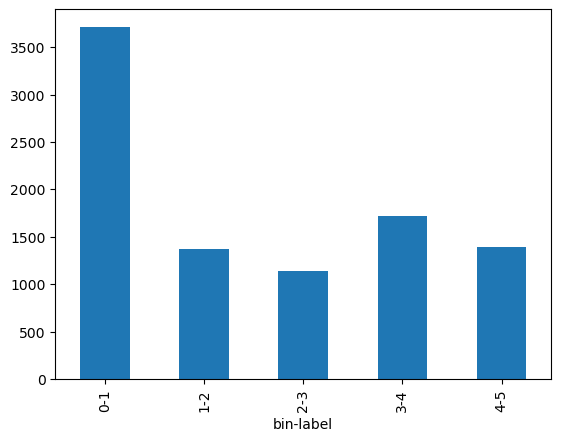

In [9]:
train_df['bin-label'].value_counts().sort_index().plot.bar()

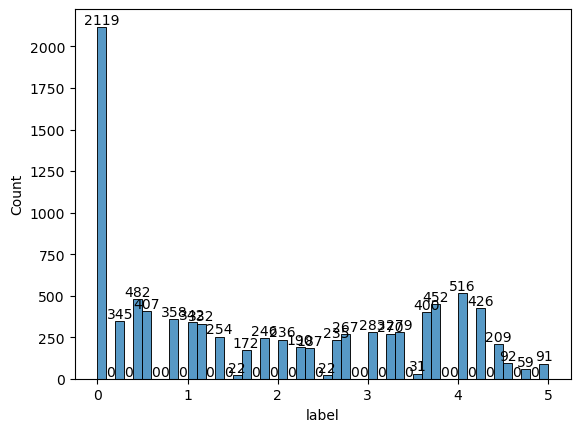

In [18]:
ax = sns.histplot(train_df['label'], bins=50)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

In [10]:
dev_df['bin-label'] = dev_df['label'].apply(binarize)

<Axes: xlabel='bin-label'>

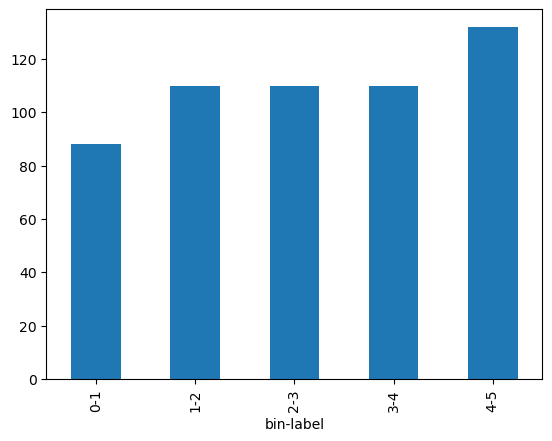

In [11]:
dev_df['bin-label'].value_counts().sort_index().plot.bar()

In [19]:
output_df = pd.read_csv('../test_outputs/snunlp/KR-ELECTRA-discriminator_v01_32_50_4e-05_007_02336_0.935_20231218_024542.csv')
output_df.head()

,id,source,sentence_1,sentence_2,label,predict
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,2.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,3.5
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,4.1
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,3.9
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,1.9


<Axes: xlabel='label', ylabel='Count'>

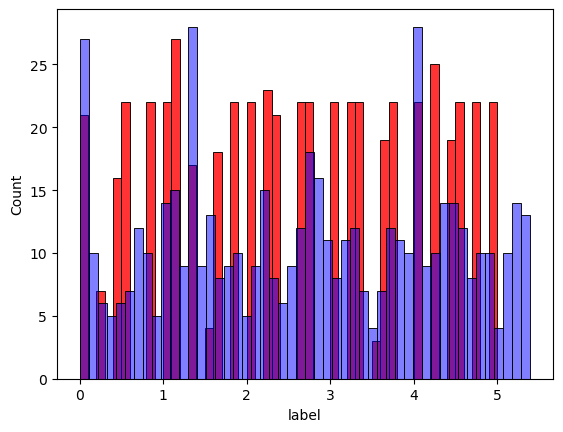

In [20]:
bins = 50
sns.histplot(output_df['label'], bins=bins, kde=False, color='red', alpha=0.8)
sns.histplot(output_df['predict'], bins=bins, kde=False, color='blue', alpha=0.5)

In [23]:
temp_df = output_df.copy()
temp_df['diff'] = temp_df['predict'] - temp_df['label']

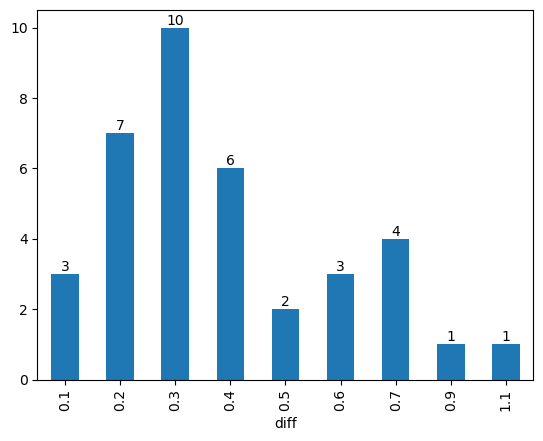

In [24]:
ax = temp_df[temp_df['predict']>5]['diff'].apply(lambda x: round(x, 3)).value_counts().sort_index().plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

In [25]:
all_range = np.linspace(0, 5, 51)
all_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [26]:
exist_range = output_df['label'].unique()
exist_range

array([2. , 3.4, 4. , 1.4, 2.4, 1.2, 4.6, 3. , 2.8, 3.2, 0. , 2.2, 2.6,
       3.8, 1.6, 0.8, 0.6, 4.4, 1. , 1.8, 5. , 4.2, 3.6, 0.4, 4.8, 4.5,
       1.5, 3.5, 0.2, 0.5])

In [27]:
not_exist_range = np.setdiff1d(all_range, exist_range)
not_exist_range

array([0.1, 0.3, 0.6, 0.7, 0.9, 1.1, 1.2, 1.3, 1.4, 1.7, 1.9, 2.1, 2.3,
       2.4, 2.5, 2.7, 2.8, 2.9, 3.1, 3.3, 3.4, 3.7, 3.8, 3.9, 4.1, 4.3,
       4.6, 4.7, 4.8, 4.9])

In [28]:
output_df[output_df['label'] == 1.2]

,id,source,sentence_1,sentence_2,label,predict
7,boostcamp-sts-v1-dev-007,slack-sampled,건강하게 자라기를!!,얼른 건강 회복하기를요!!!,1.2,1.3
19,boostcamp-sts-v1-dev-019,nsmc-sampled,매튜본 대단한 감독이엇다는걸 새삼절감,어메이징 보다가 이걸 보면 샘 레이미가 얼마나 쩌는 감독인지 새삼 느끼게 됨...,1.2,0.8
35,boostcamp-sts-v1-dev-035,slack-sampled,스터디도 함께 일정이 정리되어 있으면 좋겠습니다.,이번주 스터디는 잠시 쉬어갑니다~,1.2,1.0
53,boostcamp-sts-v1-dev-053,nsmc-sampled,평점대비 너무 하네요~,평점 너무 낮아..,1.2,2.2
129,boostcamp-sts-v1-dev-129,petition-sampled,북한 예술단에 합류 하길 청원 합니다,"평양 예술공연에 ""백지영 제외"" 청원합니다.",1.2,0.9
132,boostcamp-sts-v1-dev-132,nsmc-sampled,어른이 보기에도 잼남...,역시 어른들이 보기에는 별로였다..ㅋ,1.2,0.7
159,boostcamp-sts-v1-dev-159,slack-sampled,우리 회사만의 멋진 교육을 만들어나가기 위한 여러 이야기를 함께 나누면서 우리 회사...,그리고 앞으로 저희 회사가 나아가야 할 방향성과 단기 목표에 대해서 보다 명확하게 ...,1.2,1.0
171,boostcamp-sts-v1-dev-171,petition-rtt,(선언만 해두고 차후에 적정시점 실행),(나중에 적절한 시점에 선언하고 실행하면 됨),1.2,4.0
180,boostcamp-sts-v1-dev-180,slack-sampled,스쿼시 예습하러 갑니다 고고,한국 스쿼시 번개 기대 됩니다.,1.2,1.1
239,boostcamp-sts-v1-dev-239,nsmc-sampled,그 %때문에.. 평점은 확..,웃기고..슬프고..눈물나고..행복해지는..근데..평점이 왜케 짜~,1.2,0.9


In [29]:
new_train_df = train_df.drop(columns=['bin-label']).copy()
new_train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [30]:
new_train_df.tail()

,id,source,sentence_1,sentence_2,label,binary-label
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0
9323,boostcamp-sts-v1-train-9323,petition-sampled,법정공휴일 휴무관련 (근로자),법정공휴일의 유급휴무화를 막아야 합니다.,1.4,0.0


In [60]:
from tqdm.notebook import tqdm

In [118]:
id_prefix = "boostcamp-sts-v1-train-"
start_id = 9324

In [119]:
new_train_df_dict = {key: [] for key in new_train_df.columns}
new_train_df_dict

{'id': [],
 'source': [],
 'sentence_1': [],
 'sentence_2': [],
 'label': [],
 'binary-label': []}

In [121]:
for i, row in tqdm(train_df.iterrows()):
    # if row['label'] <= 0 or row['label'] >= 5:
    #     continue
    new_train_df_dict['id'].append(id_prefix + str(start_id + i))
    new_train_df_dict['source'].append(''.join([row['source'].split('-')[1], '-', row['source'].split('-')[0]]))
    new_train_df_dict['sentence_1'].append(row['sentence_2'])
    new_train_df_dict['sentence_2'].append(row['sentence_1'])
    new_train_df_dict['label'].append(row['label'])
    new_train_df_dict['binary-label'].append(row['binary-label'])

reverse_train_df = pd.DataFrame(new_train_df_dict)
reverse_train_df.head()

0it [00:00, ?it/s]

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-9324,sampled-nsmc,"반전도 있고,사랑도 있고재미도있네요.",스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,2.2,0.0
1,boostcamp-sts-v1-train-9325,rtt-slack,"오, 액세스 권한이 없다고 합니다.",앗 제가 접근권한이 없다고 뜹니다;;,4.2,1.0
2,boostcamp-sts-v1-train-9326,sampled-petition,주택청약 무주택기준 변경해주세요.,주택청약조건 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-9327,sampled-slack,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,입사후 처음 대면으로 만나 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-9329,rtt-nsmc,오 마이 갓 지저스 스크론 이스트 팬,오마이가뜨지져스크롸이스트휏,2.6,1.0


In [122]:
reverse_train_df.tail()

,id,source,sentence_1,sentence_2,label,binary-label
16433,boostcamp-sts-v1-train-18643,sampled-petition,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,0.2,0.0
16434,boostcamp-sts-v1-train-18644,sampled-petition,여성가족부 폐지를 청원 합니다.,여성가족부의 폐지를 원합니드,4.2,1.0
16435,boostcamp-sts-v1-train-18645,sampled-petition,공무원 봉급좀 줄이지좀 마세요,국회의원들 월급좀 줄여주세요,0.6,0.0
16436,boostcamp-sts-v1-train-18646,sampled-slack,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,3.2,1.0
16437,boostcamp-sts-v1-train-18647,sampled-petition,법정공휴일의 유급휴무화를 막아야 합니다.,법정공휴일 휴무관련 (근로자),1.4,0.0


In [123]:
concat_train_df = pd.concat([new_train_df, reverse_train_df], axis=0).reset_index(drop=True)
concat_train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [124]:
concat_train_df.shape

(25762, 6)

In [125]:
concat_train_df.tail()

,id,source,sentence_1,sentence_2,label,binary-label
25757,boostcamp-sts-v1-train-18643,sampled-petition,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,0.2,0.0
25758,boostcamp-sts-v1-train-18644,sampled-petition,여성가족부 폐지를 청원 합니다.,여성가족부의 폐지를 원합니드,4.2,1.0
25759,boostcamp-sts-v1-train-18645,sampled-petition,공무원 봉급좀 줄이지좀 마세요,국회의원들 월급좀 줄여주세요,0.6,0.0
25760,boostcamp-sts-v1-train-18646,sampled-slack,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,3.2,1.0
25761,boostcamp-sts-v1-train-18647,sampled-petition,법정공휴일의 유급휴무화를 막아야 합니다.,법정공휴일 휴무관련 (근로자),1.4,0.0


In [127]:
concat_train_df.to_csv('concat_train.csv', index=False)

In [120]:
shuffle_train_df = concat_train_df.sample(frac=1).reset_index(drop=True)

In [121]:
shuffle_train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-10240,rtt-slack,대학원 공부도 열심히 하시고 기회가 된다면 저희 회사에서 다시 만나요!,대학원 생활 열심히하시고 기회되면 다시 우리 회사에서 뵈어요!,3.8,1.0
1,boostcamp-sts-v1-train-9607,rtt-nsmc,인생이 어떻게 될지 모르는 것과 같습니다.,인생이란 어떻게 될지 모르는 듯.,3.4,1.0
2,boostcamp-sts-v1-train-17024,sampled-slack,참고로 그 옆에 외계인 방앗간 집도 맛있습니다 ㅎㅎ,외계인 방앗간 맛잇죠,3.2,1.0
3,boostcamp-sts-v1-train-6345,nsmc-rtt,개봉당시에 너무 묻혀버려서 안타깝다.,열렸을 때 이렇게 묻힌 것이 유감입니다.,3.8,1.0
4,boostcamp-sts-v1-train-13398,sampled-petition,개천절 (7/17) 공휴일 재지정 당장 실시하라,제헌절 공휴일 재지정 부탁드립니다,2.4,0.0


In [126]:
shuffle_train_df.to_csv('reverse_train.csv', index=False)

NameError: name 'shuffle_train_df' is not defined

Tokenizer 가 이해 못한 단어 찾기

- `monologg/koelectra-base-v3-discriminator`

In [67]:
import transformers
import pytorch_lightning as pl
from itertools import chain

In [33]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,bin-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,2-3
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,4-5
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,2-3
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,3-4
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,0-1


In [32]:
tokenizer = transformers.ElectraTokenizer.from_pretrained('snunlp/KR-ELECTRA-discriminator')

In [34]:
train_df['sentence_1'][0]

'스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~'

In [35]:
tokens = tokenizer(train_df['sentence_1'][0])

In [44]:
train_df.iloc[100]

id              boostcamp-sts-v1-train-100
source                    petition-sampled
sentence_1                 히딩크감독님을 모셔와야합니다
sentence_2          히딩크감독을 다시 대한민국 축구 감독으로
label                                  3.2
binary-label                           1.0
bin-label                              3-4
Name: 100, dtype: object

In [55]:
def find_unknown_tokens(tokenizer, sentence):
    # Tokenize the sentence
    tokenized_output = tokenizer.encode(sentence)

    # Initialize a list to store unknown tokens
    unknown_tokens = []

    # Check each token
    for token in tokenized_output:
        # Check if the token is in the tokenizer's vocabulary
        if token not in tokenizer.get_vocab():
            unknown_tokens.append(token)

    print(f"Token ids: {tokenized_output}")
    print(f"Tokenized: {tokenizer.convert_ids_to_tokens(tokenized_output)}")
    
    return unknown_tokens

In [56]:
find_unknown_tokens(tokenizer, train_df['sentence_1'][100])

Token ids: [2, 29065, 5433, 5717, 5486, 5103, 16770, 5165, 5146, 10481, 3]
Tokenized: ['[CLS]', '히딩크', '##감', '##독', '##님', '##을', '모셔', '##와', '##야', '##합니다', '[SEP]']


[2, 29065, 5433, 5717, 5486, 5103, 16770, 5165, 5146, 10481, 3]

In [57]:
vocab = tokenizer.get_vocab()

In [58]:
vocab['[UNK]']

1

In [61]:
all_sentences = []
for i, row in tqdm(train_df.iterrows()):
    all_sentences.append(row['sentence_1'])
    all_sentences.append(row['sentence_2'])

0it [00:00, ?it/s]

In [112]:
len(all_sentences)

18648

In [106]:
def find_unknown_token_from_sentences(tokenizer, sentences):
    unknown_token_sentences = []
    for sentence in tqdm(sentences):
        # Tokenize the sentence
        token_ids = tokenizer.encode(sentence)
        if 1 in token_ids:
            tokens = tokenizer.convert_ids_to_tokens(token_ids)
            unknown_token_sentences.append({sentence: tokens})
    return unknown_token_sentences

In [113]:
unknown_token_sentences = find_unknown_token_from_sentences(tokenizer, all_sentences)

  0%|          | 0/18648 [00:00<?, ?it/s]

In [114]:
len(unknown_token_sentences)

26

In [117]:
for i, uts in enumerate(unknown_token_sentences):
    print(f"#{i+1}" + "="*100)
    print(f"Sentence: {list(uts.keys())[0]}")
    print(f"Tokens: {'_'.join(list(uts.values())[0])}\n")

#1====================================================================================================
Sentence: 오마이가뜨지져스크롸이스트휏
Tokens: [CLS]_[UNK]_[SEP]

#2====================================================================================================
Sentence: ☼문재인정부는 교육을 획기적으로 개혁하라!
Tokens: [CLS]_[UNK]_교육_##을_획기적으로_개혁_##하라_!_[SEP]

#3====================================================================================================
Sentence: 나만 당할순 없다.... o(｀ )o
Tokens: [CLS]_나_##만_당할_##순_없_##다_._._._._o_(_[UNK]_)_o_[SEP]

#4====================================================================================================
Sentence: 달리기 자세는 뭐 보샸나요?
Tokens: [CLS]_달리_##기_자세_##는_뭐_[UNK]_?_[SEP]

#5====================================================================================================
Sentence: 듣고보니 지금 아이가 더욱 귀염뽀쨕해보이네요 ㅎㅎ
Tokens: [CLS]_듣_##고_##보_##니_지금_아이_##가_더욱_[UNK]_ㅎㅎ_[SEP]

#6========================================================================================

In [ ]:
def find_unknowns(df, tokenizer):
    all_sentences = []
    for i, row in tqdm(df.iterrows()):
        all_sentences.append(row['sentence_1'])
        all_sentences.append(row['sentence_2'])
    unknown_token_sentences = find_unknown_token_from_sentences(tokenizer, all_sentences)

    for i, uts in enumerate(unknown_token_sentences):
        print(f"#{i+1}" + "="*100)
        print(f"Sentence: {list(uts.keys())[0]}")
        print(f"Tokens: {'_'.join(list(uts.values())[0])}\n")

    return unknown_token_sentences